In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression

**Importing Files**

In [2]:
companies = pd.read_csv("C:\\Users\\ASUS\\Downloads\\companies.csv", encoding='latin1')
companies.head(6)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [3]:
rounds= pd.read_csv("C:\\Users\\ASUS\\Downloads\\rounds2.csv", encoding='latin1')
rounds.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
mapp= pd.read_csv("C:\\Users\\ASUS\\Downloads\\mapping.csv")
mapp.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


#### Data Preparation

In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [7]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [9]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [10]:
mapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [11]:
mapp.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [12]:
companies['permalink'] = companies['permalink'].apply(lambda x: x[14:].upper())
companies['status'] = companies['status'].apply(lambda x:x.upper())
name= companies['name'].apply(lambda x: str(x).upper())

def process(x):
    if pd.notnull(x) and '|' in x:
        return str(x.split('|')[0].upper())
    elif pd.notnull(x):
        return str(x).upper()
    else:
        return x
companies['primary_sector'] = companies['category_list'].apply(process)

In [13]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,-FAME,#fame,http://livfame.com,Media,OPERATING,IND,16,Mumbai,Mumbai,NaN,MEDIA
1,-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,OPERATING,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
2,-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,OPERATING,NaN,NaN,NaN,NaN,NaN,APPS
3,0-6-COM,0-6.com,http://www.0-6.com,Curated Web,OPERATING,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB
4,004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,OPERATING,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,SOFTWARE


In [14]:
rounds['company_permalink'] = rounds['company_permalink'].apply(lambda x: x[14: ].upper())
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Merging Dataframes

In [15]:
main_df = rounds.merge(companies, left_on='company_permalink', right_on='permalink', how='inner')
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114942 entries, 0 to 114941
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        94958 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

#### FIlling Tables

In [16]:
print('Unique Companies in Companies Table:', companies['permalink'].nunique())

print('Unique Companies in Companies Table by names:', companies['name'].apply(lambda x: str(x).casefold()).nunique())

print('Companies having same Name but different IDs:', name[name.duplicated() == True].count())

print('Unique Companies in Rounds Table:', rounds['company_permalink'].nunique())

print('Unique Companies in Main Table:', main_df['permalink'].nunique())


Unique Companies in Companies Table: 66368
Unique Companies in Companies Table by names: 66035
Companies having same Name but different IDs: 333
Unique Companies in Rounds Table: 66370
Unique Companies in Main Table: 66363


#### Investments per Funding Type in 15M Range

                   raised_amount_usd
                                mean
funding_round_type                  
angel                       958694.0
private_equity            73308593.0
seed                        719780.0
venture                   11748949.0


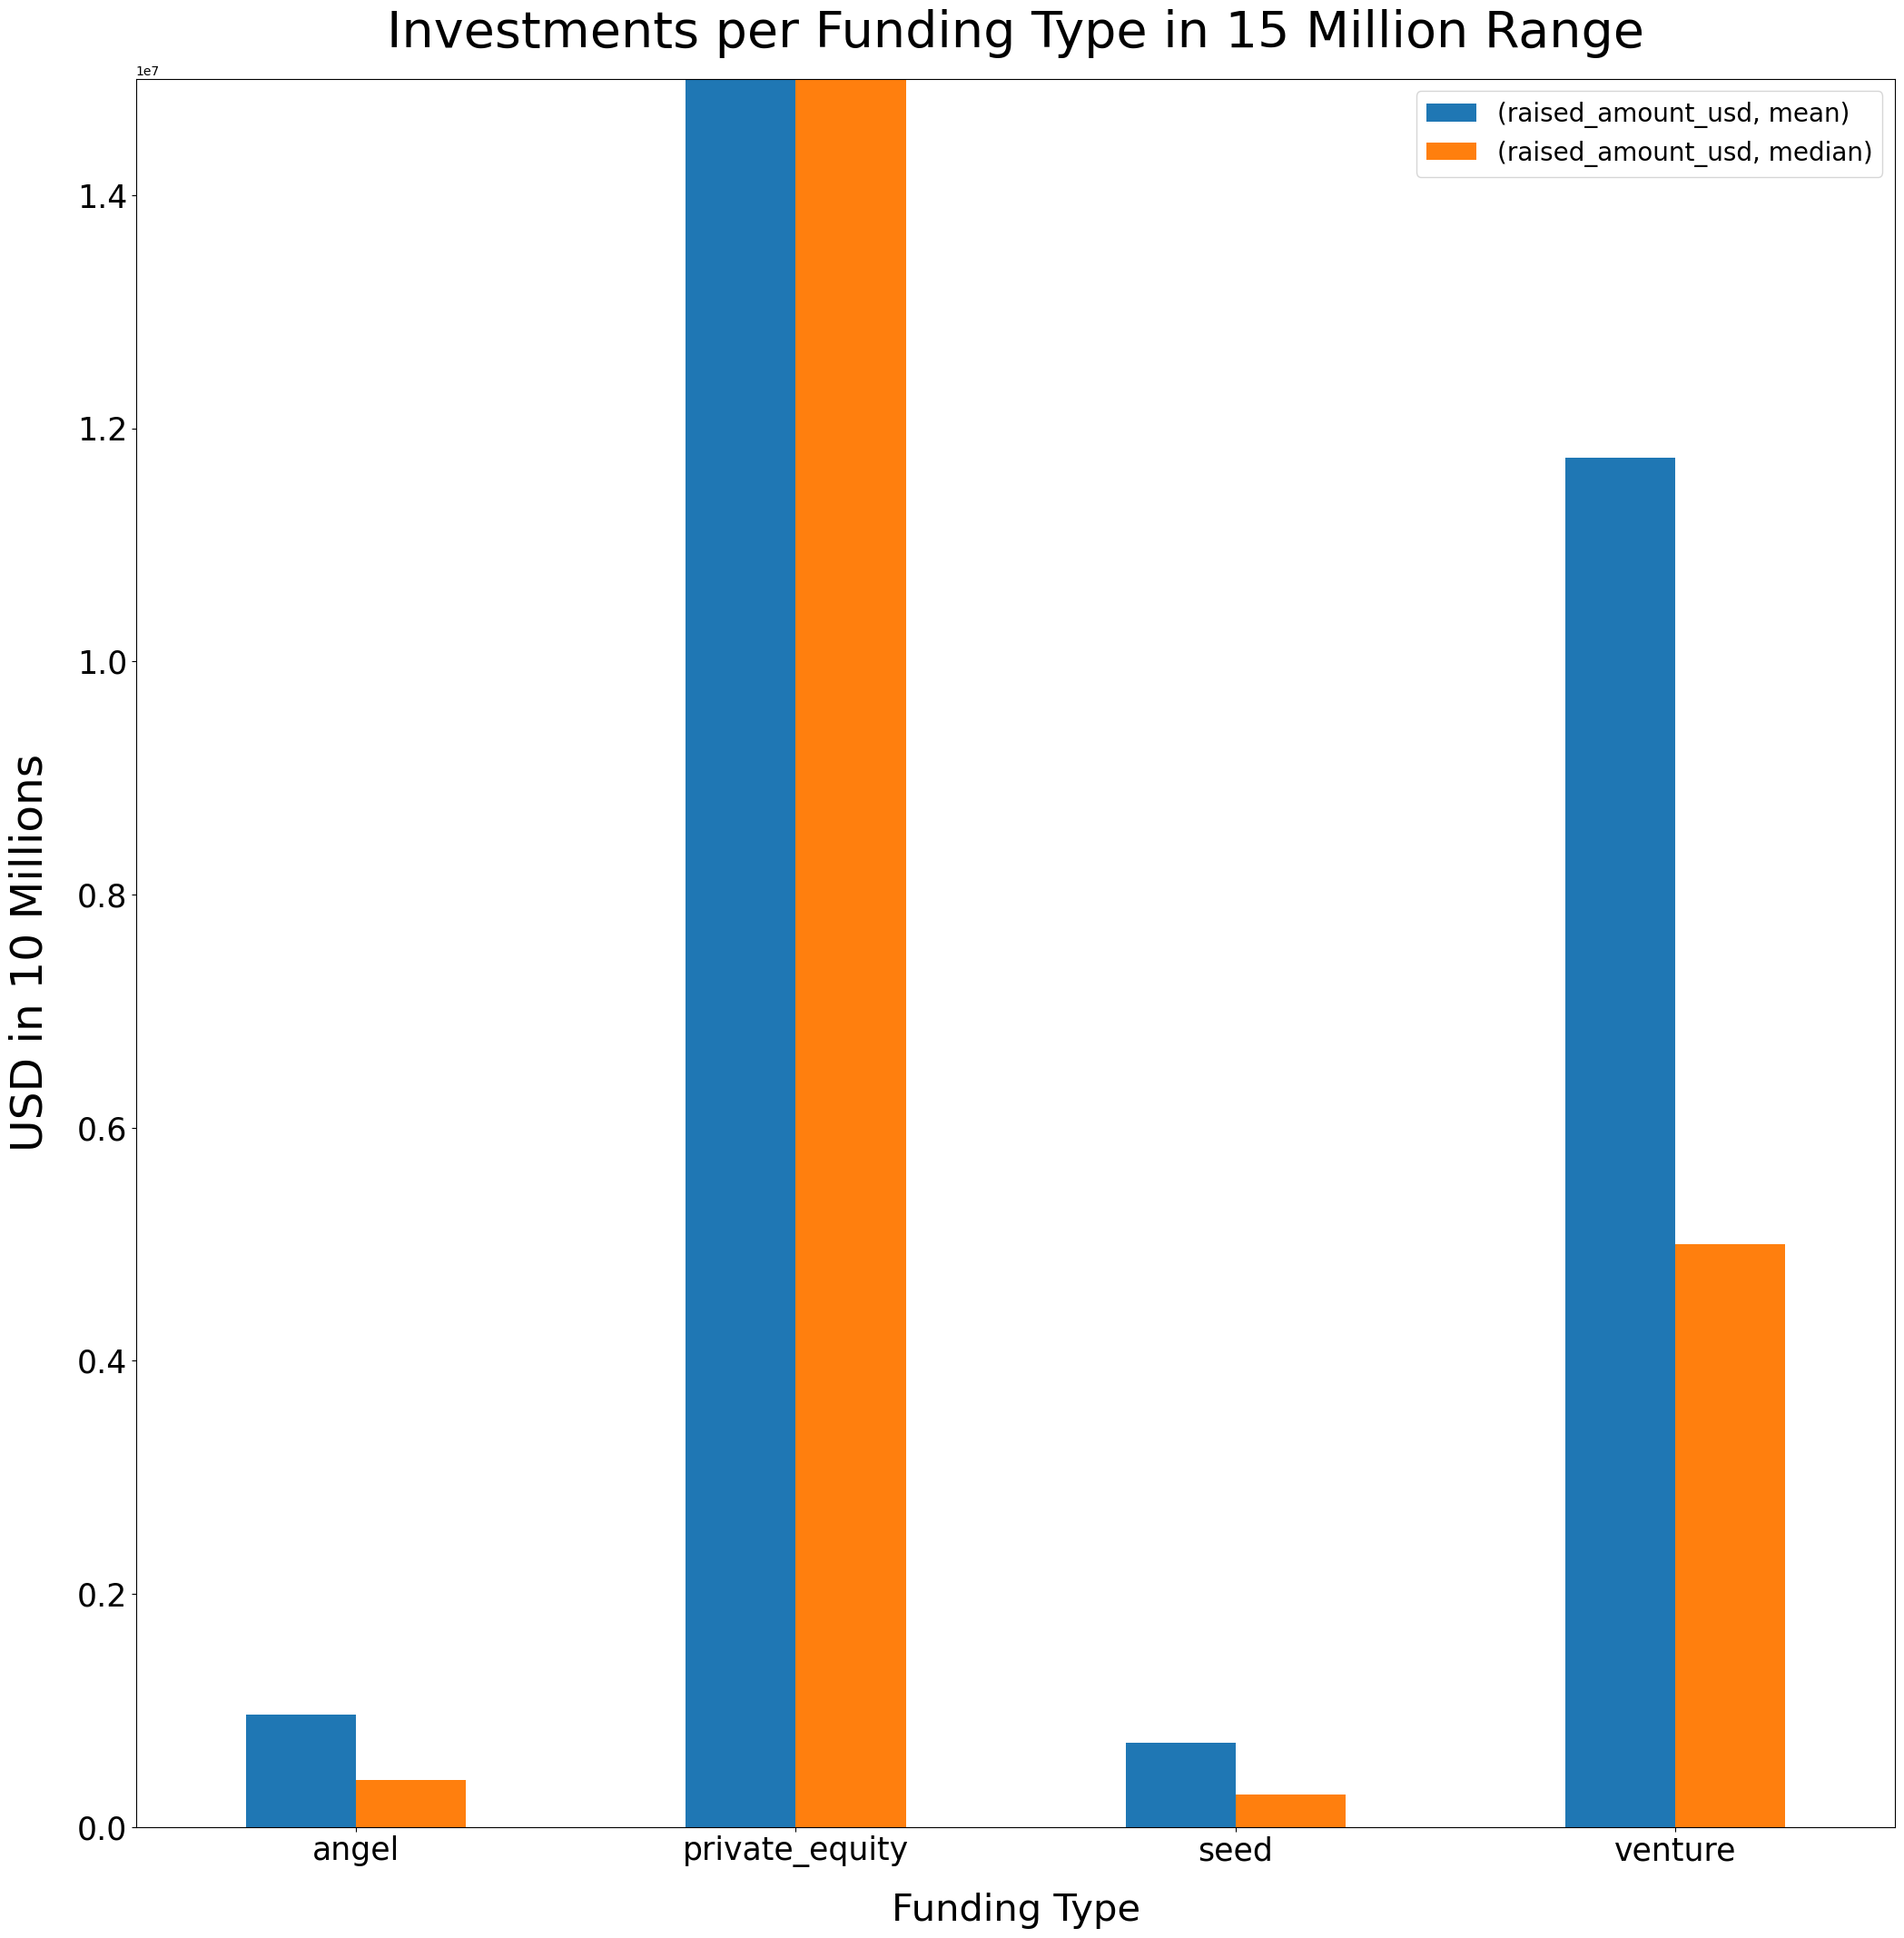

In [17]:
fund_type = main_df.loc[:,['funding_round_type', 'raised_amount_usd']]
types = ['seed','angel','venture','private_equity']
fund_type = fund_type[fund_type['funding_round_type'].isin(types)]

plt.rcParams['figure.figsize'] = [25, 25]


def percentile_95(x):
    return x.quantile(0.95)
def percentile_90(x):
    return x.quantile(0.90)
def percentile_75(x):
    return x.quantile(0.75)


plot = fund_type.groupby(['funding_round_type']).agg({"raised_amount_usd": [np.mean, np.median]}).round().plot
plot.bar(ylim=(0, 15000000), rot=0, fontsize=25)
plt.xlabel('Funding Type', fontsize=30, labelpad=20)
plt.ylabel('USD in 10 Millions', fontsize=35,labelpad=20)
plt.title('Investments per Funding Type in 15 Million Range', fontsize=40, pad=25)
plt.legend(fontsize=20)
print(fund_type.groupby(['funding_round_type']).agg({"raised_amount_usd": [np.mean]}).round())
plt.show()

As seen from the graph Seed and Angel is below 5M range and Private equity is above the 15M range. And as Venture funding is in 5- 15M range therefore venture funding is the suitable investment type for Spark Funds 

### Top countries with Maximum Venture Investment

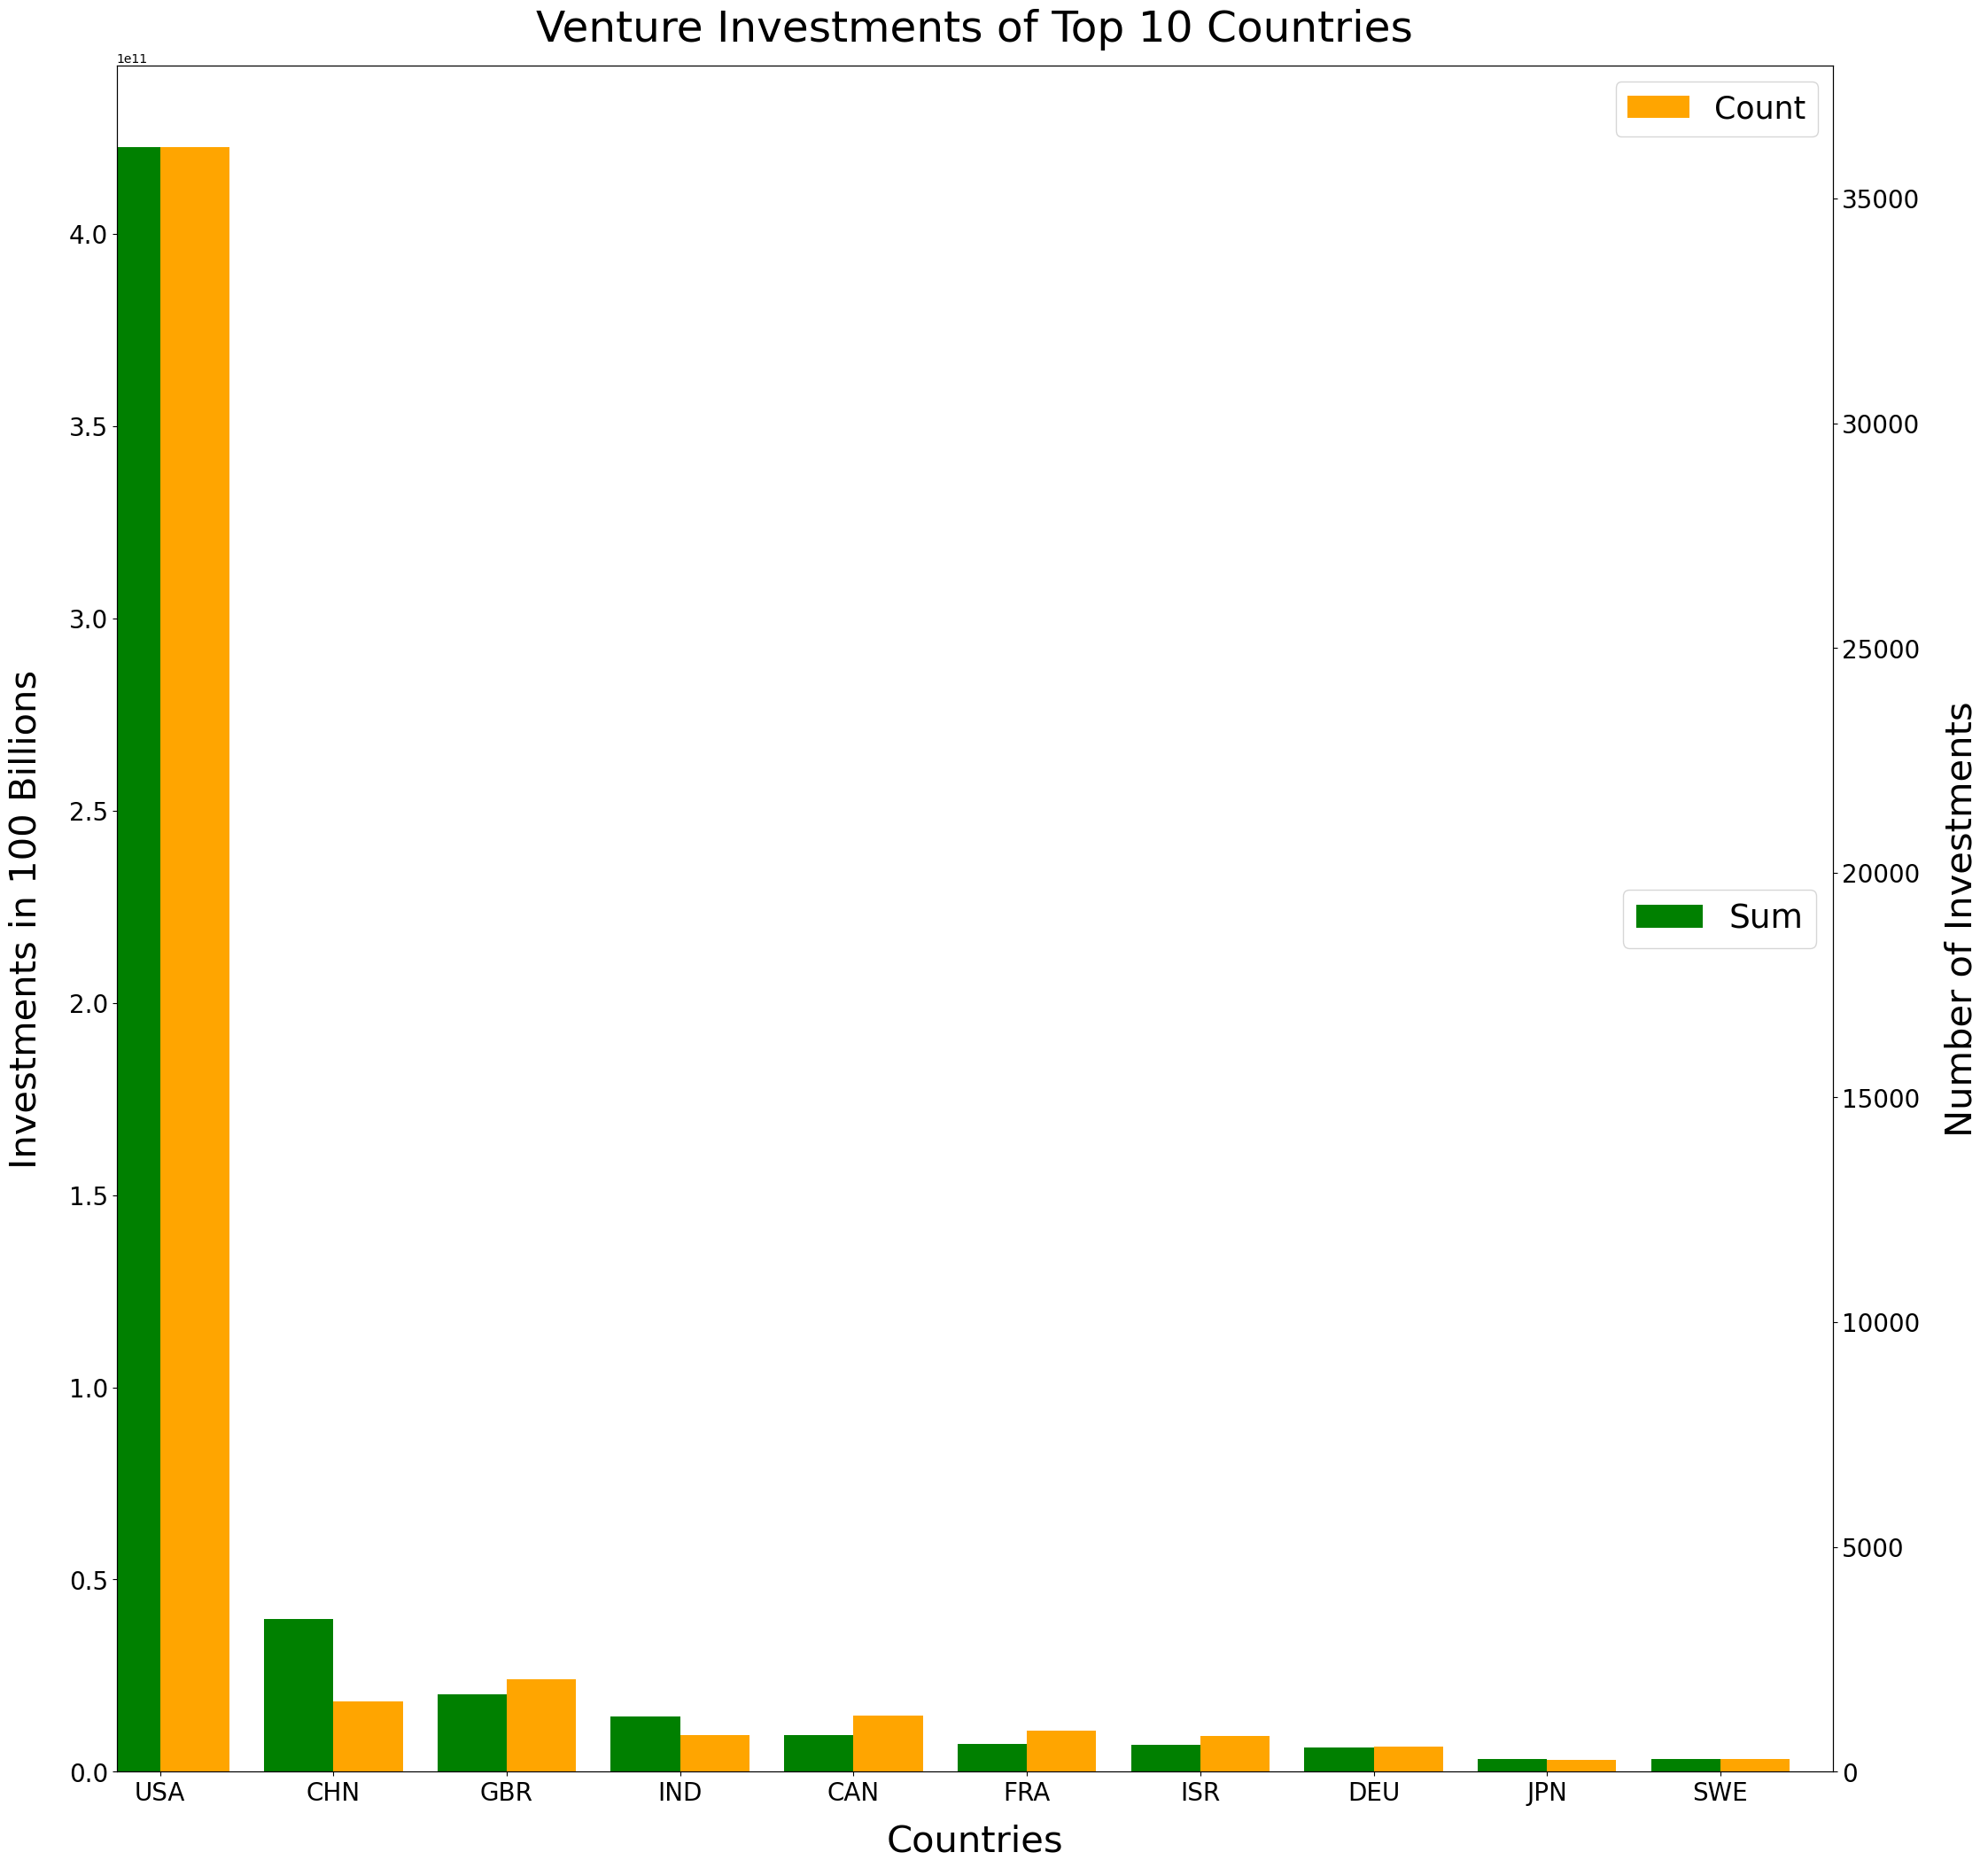

In [18]:
countrywise_df = main_df.loc[:,['funding_round_type', 'raised_amount_usd', 'country_code']]

countrywise_df = countrywise_df[countrywise_df['funding_round_type'].isin(['venture'])]
countrywise_venture_df = countrywise_df.loc[:,['raised_amount_usd', 'country_code']]
countrywise_venture_df['country_code'].unique()

top_countries = countrywise_venture_df.groupby(['country_code']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(['Sum', 'Count'], ascending=False).head(10)



fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
plt.rcParams['figure.figsize'] = [20, 15]
top_countries.Sum.plot(kind='bar', color='green', ax=ax, width=width, position=1, rot=0, fontsize=20)
top_countries.Count.plot(kind='bar', color='orange', ax=ax2, width=width, position=0, fontsize=20)
plt.title('Venture Investments of Top 10 Countries', fontsize=35, pad=20)
ax.set_ylabel('Investments in 100 Billions', fontsize=30,labelpad=20)
ax.set_xlabel('Countries', fontsize=30, labelpad=15)
ax2.set_ylabel('Number of Investments', fontsize=30,labelpad=20)
ax2.legend(loc=0, fontsize=25)
ax.legend(loc=7, fontsize=27)

plt.show()

As seen USA, China, Great Britain, India, Canada are the top 5 highest Venture Investments Countries. And USA, Great Britain, Canada are the top 3 English Speaking highest venture investments countries.

#### Create Main sectors Columns

In [19]:
print(mapp.dtypes)

# For illustration, assuming that all columns except 'category_list' need to be numeric
numeric_columns = mapp.columns[1:]  # all columns except the first one
mapp[numeric_columns] = mapp[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for any non-numeric columns
print(mapp[numeric_columns].dtypes)

# Now apply idxmax on the numeric columns
mapp['main_sectors'] = mapp.iloc[:, 1:].idxmax(axis=1)

# Inspect the result
print(mapp.head())

category_list                              object
Automotive & Sports                         int64
Blanks                                      int64
Cleantech / Semiconductors                  int64
Entertainment                               int64
Health                                      int64
Manufacturing                               int64
News, Search and Messaging                  int64
Others                                      int64
Social, Finance, Analytics, Advertising     int64
dtype: object
Automotive & Sports                        int64
Blanks                                     int64
Cleantech / Semiconductors                 int64
Entertainment                              int64
Health                                     int64
Manufacturing                              int64
News, Search and Messaging                 int64
Others                                     int64
Social, Finance, Analytics, Advertising    int64
dtype: object
   category_list  Automotive & 

In [20]:
mapp['main_sectors'] = mapp['main_sectors'].apply(lambda x: x.upper())
mapp_subset = mapp.loc[:,['category_list','main_sectors']]
mapp_subset = mapp_subset[mapp_subset['main_sectors'] != 'BLANKS']

#### Creating Main Dataframe by combining Main Dataframe  with Mapp 

In [21]:
main_df_sector = main_df.merge(mapp_subset, left_on='primary_sector', right_on='category_list', how='inner')
main_df_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
0,25EIGHT,/funding-round/354fd5ac4d6ed663bf4fd123395b608a,seed,NaN,26-01-2010,25000.0,25EIGHT,25eight,http://25eightsoftware.com,DIY|Electronics|Software,CLOSED,USA,CA,SF Bay Area,San Francisco,NaN,DIY,DIY,OTHERS
1,APARTAMA,/funding-round/6989c1de529d2026fd29dbf6c5e82ebc,venture,A,01-10-2012,1000000.0,APARTAMA,Apartama,http://apartama.ru/,DIY|Home Decor|Online Shopping,CLOSED,RUS,48,Moscow,Moscow,NaN,DIY,DIY,OTHERS
2,APPSPOTR,/funding-round/6df0667e495fcae621c835c8dae1525d,angel,NaN,01-06-2014,329500.0,APPSPOTR,AppSpotr,http://www.appspotr.com,DIY|Mobile Commerce|SaaS,OPERATING,SWE,28,Gothenburg,GÃ¶teborg,01-06-2012,DIY,DIY,OTHERS
3,BACK-TO-THE-ROOTS,/funding-round/26c386f784fff16329d24436195beabc,seed,NaN,10-06-2015,2000000.0,BACK-TO-THE-ROOTS,Back to the Roots,http://backtotheroots.com,DIY|Environmental Innovation,OPERATING,USA,CA,SF Bay Area,Oakland,01-03-2009,DIY,DIY,OTHERS
4,BLOOMINOUS,/funding-round/96809545b410e66e8b2ef9199de48c2a,seed,NaN,11-03-2014,200000.0,BLOOMINOUS,Bloominous,http://bloominous.com,DIY|E-Commerce|Events|Flowers|Weddings,OPERATING,USA,CA,Los Angeles,Los Angeles,06-09-2013,DIY,DIY,OTHERS


### Sector wise analysis of top 3 English Speaking Countries

1) USA
2) Great Britain(GBR)
3) Canada(CAN)

In [22]:
usa_venture_df = main_df_sector[main_df_sector['country_code'].isin(['USA']) & 
                                       main_df_sector['funding_round_type'].isin(['venture']) &
                                      main_df_sector['raised_amount_usd'].between(5000000, 15000000, inclusive='both')]

usa_venture_df.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
7,MAKER-MEDIA,/funding-round/8891e274756e23dfff23a9224df79b06,venture,NaN,01-04-2013,5000000.0,MAKER-MEDIA,Maker Media,http://makermedia.com,DIY|E-Commerce|Events|Media,OPERATING,USA,CA,Napa Valley,Sebastopol,01-01-2013,DIY,DIY,OTHERS
8,MAKER-MEDIA,/funding-round/ec3aa0941b42de2f4eaf6ca1373aa979,venture,A,09-06-2015,5000000.0,MAKER-MEDIA,Maker Media,http://makermedia.com,DIY|E-Commerce|Events|Media,OPERATING,USA,CA,Napa Valley,Sebastopol,01-01-2013,DIY,DIY,OTHERS
41,ACCOMPANY,/funding-round/5487aebe83d68e93df681fd2af148f3e,venture,A,16-06-2014,5600000.0,ACCOMPANY,Accompany,https://www.accompany.com,3D|Social Media|Technology,OPERATING,USA,CA,SF Bay Area,Los Altos,01-01-2013,3D,3D,MANUFACTURING
42,ACCOMPANY,/funding-round/b17ddae77db3a42e95c3747c1eaff7ab,venture,B,19-11-2014,15000000.0,ACCOMPANY,Accompany,https://www.accompany.com,3D|Social Media|Technology,OPERATING,USA,CA,SF Bay Area,Los Altos,01-01-2013,3D,3D,MANUFACTURING
51,ATHEER-LABS,/funding-round/421a7fd81521326fd83a2aefc80e3a77,venture,B,03-08-2015,9058298.0,ATHEER-LABS,Atheer Labs,http://www.atheerlabs.com,3D|Augmented Reality|Delivery|Hardware + Softw...,OPERATING,USA,CA,SF Bay Area,Mountain View,01-01-2011,3D,3D,MANUFACTURING


In [23]:
gbr_venture_df = main_df_sector[main_df_sector['country_code'].isin(['GBR']) & 
                                       main_df_sector['funding_round_type'].isin(['venture']) &
                                      main_df_sector['raised_amount_usd'].between(5000000, 15000000, inclusive='both')]

gbr_venture_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
179,MYDECO,/funding-round/5e61f3bc3ee671466a780e2d33b1a97b,venture,A,01-08-2008,14529275.0,MYDECO,mydeco,http://mydeco.com,3D|Curated Web|E-Commerce|Home & Garden,ACQUIRED,GBR,H9,London,London,01-02-2007,3D,3D,MANUFACTURING
475,KANTOX,/funding-round/41c2cc62723b6a8fdb0fc4dcc63c476d,venture,A,10-02-2014,8724972.0,KANTOX,Kantox,http://www.kantox.com,B2B|Enterprise Software|Finance Technology|Fin...,OPERATING,GBR,H9,London,London,03-06-2011,B2B,B2B,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
477,KANTOX,/funding-round/dbcec8b271ec9656d3e5d06c7a69f962,venture,B,27-05-2015,10921362.0,KANTOX,Kantox,http://www.kantox.com,B2B|Enterprise Software|Finance Technology|Fin...,OPERATING,GBR,H9,London,London,03-06-2011,B2B,B2B,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
962,HASSLE-COM,/funding-round/e7c243a06c03374d628a169f4c47e74a,venture,A,08-05-2014,6000000.0,HASSLE-COM,Hassle.com,http://hassle.com,CRM|E-Commerce|Local|Local Based Services|Smal...,ACQUIRED,GBR,H9,London,London,01-11-2011,CRM,CRM,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"


In [24]:
can_venture_df = main_df_sector[main_df_sector['country_code'].isin(['CAN']) & 
                                       main_df_sector['funding_round_type'].isin(['venture']) &
                                      main_df_sector['raised_amount_usd'].between(5000000, 15000000, inclusive='both')]

can_venture_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sectors
150,LAGOA,/funding-round/efda593b67f7fcc5f5f50629ced1379a,venture,A,10-12-2013,5300000.0,LAGOA,Lagoa,http://lagoa.com,3D|Enterprise Software|Games,ACQUIRED,CAN,QC,Montreal,MontrÃ©al,16-01-2012,3D,3D,MANUFACTURING
181,NGRAIN,/funding-round/a32630c7995db8cffe4d8a3352c8dca8,venture,NaN,30-04-2007,12470000.0,NGRAIN,NGRAIN,http://www.ngrain.com,3D|Augmented Reality|Software,OPERATING,CAN,BC,Vancouver,Vancouver,01-01-2000,3D,3D,MANUFACTURING
558,NULOGY,/funding-round/7369c25acf049afc03bfe7b4131a828d,venture,NaN,08-10-2014,7500000.0,NULOGY,Nulogy,http://www.nulogy.com,B2B|Cloud Computing|Enterprises|Logistics|Manu...,OPERATING,CAN,ON,Toronto,Toronto,01-01-2002,B2B,B2B,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"
1039,RADIAN6,/funding-round/48500e53e76253272f9a39d8b78bf131,venture,B,01-12-2008,5000000.0,RADIAN6,Salesforce Radian6,http://www.radian6.com,CRM|Curated Web|Social Media Marketing|Social ...,ACQUIRED,CAN,NS,Fredericton,Fredericton,01-04-2006,CRM,CRM,"SOCIAL, FINANCE, ANALYTICS, ADVERTISING"


### Count And Sum of Venture Investments in the Top 3 Countries

##### USA

In [25]:
print('Count: ',usa_venture_df['raised_amount_usd'].count(),'Sum: ',usa_venture_df['raised_amount_usd'].sum())

Count:  85 Sum:  777851102.0


##### GBR

In [26]:
print('Count: ',gbr_venture_df['raised_amount_usd'].count(), 'Sum: ',gbr_venture_df['raised_amount_usd'].sum())

Count:  4 Sum:  40175609.0


##### CANADA


In [27]:
print('Count:',can_venture_df['raised_amount_usd'].count(), 'Sum:',can_venture_df['raised_amount_usd'].sum())


Count: 4 Sum: 30270000.0


### Top sectors in each Country

#### USA

In [28]:
sector = usa_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

usa_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
main_sectors,,
"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",53,494478804.0
MANUFACTURING,19,153618298.0
OTHERS,7,66104000.0


#### GBR

In [29]:
sector = pd.concat([sector, gbr_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)])

gbr_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
main_sectors,,
"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",3,25646334.0
MANUFACTURING,1,14529275.0


#### CANADA

In [30]:
sector = pd.concat([sector, can_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), 
                        Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)])

can_venture_df.groupby(['main_sectors']).agg(Count=('raised_amount_usd', 'count'), Sum=('raised_amount_usd', 
                            'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
main_sectors,,
MANUFACTURING,2,17770000.0
"SOCIAL, FINANCE, ANALYTICS, ADVERTISING",2,12500000.0


## Highest Invested Company In Top Sectors of USA

**SOCIAL, FINANCE, ANALYTICS, ADVERTISING**

In [31]:
usa_venture_df[usa_venture_df['main_sectors'].isin(['SOCIAL, FINANCE, ANALYTICS, ADVERTISING'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
Xenon Arc,2,27509998.0
Yesware,2,26800000.0
"Aviso, Inc.",2,23000000.0


**MANUFACTURING**

In [32]:
usa_venture_df[usa_venture_df['main_sectors'].isin(['MANUFACTURING'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
IMVU,3,28000000.0
Gizmoz,3,18100000.0
Accompany,2,20600000.0


**OTHERS**

In [33]:
usa_venture_df[usa_venture_df['main_sectors'].isin(['OTHERS'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)

,Count,Sum
name,,
Identec Solutions,3,35304000.0
Maker Media,2,10000000.0
Questra,1,12500000.0


## Highest Invested Company in Top Sectors of Great Britain


**SOCIAL, FINANCE, ANALYTICS, ADVERTISING**

In [34]:
gbr_venture_df[gbr_venture_df['main_sectors'].isin(['MANUFACTURING'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)


,Count,Sum
name,,
mydeco,1,14529275.0


**MANUFACTURING**

In [35]:
gbr_venture_df[gbr_venture_df['main_sectors'].isin(['SOCIAL, FINANCE, ANALYTICS, ADVERTISING'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)


,Count,Sum
name,,
Kantox,2,19646334.0
Hassle.com,1,6000000.0


## Highest Invested Companies in Top Sectors of Canada

**MANUFACTURING**

In [36]:
can_venture_df[can_venture_df['main_sectors'].isin(['MANUFACTURING'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)


,Count,Sum
name,,
NGRAIN,1,12470000.0
Lagoa,1,5300000.0


**SOCIAL, FINANCE, ANALYTICS, ADVERTISING**

In [37]:
can_venture_df[can_venture_df['main_sectors'].isin(['SOCIAL, FINANCE, ANALYTICS, ADVERTISING'])].groupby(['name']).agg(Count=('raised_amount_usd', 
                'count'), Sum=('raised_amount_usd', 'sum')).round().sort_values(by=['Count','Sum'], ascending=False).head(3)


,Count,Sum
name,,
Nulogy,1,7500000.0
Salesforce Radian6,1,5000000.0
